IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


#  Semaine 2 : programmation du perceptron de Rosenblatt

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

KRISNI Almehdi - 3800519

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-02</tt> et rajouter à la suite de <tt>tme-02</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-02-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echéancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis avant le début de la séance de la semaine suivante.


## Présentation ##

Dans ce TME, nous allons mettre en place une "architecture" de code nous permettant petit à petit de tester tout au long du semestre différents modèles d'apprentissage supervisé. Dans nos séances, nous allons nous restreindre au cas binaire où les étiquettes des exemples sont $+1$ ou $-1$.


### Objectifs de ce TME

Le travail à réaliser est le suivant :
- continuer à apprendre à (bien) utiliser jupyter notebook
- générer aléatoirement des datasets jouets pour expérimenter
- se familiariser avec la classe `Classifier` et implémenter un premier classifieur simple
- implémenter l'algorithme du perceptron de Rosenblatt
- réaliser des expérimentations pour étudier les performances de cet algorithme

Les imports suivants seront généralement nécessaires pour nos séances:

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math as mt
%matplotlib inline  

**Remarques :**
Sauf indication contraire, les vecteurs et les matrices seront représentés par des `np.ndarray` numpy.

La construction la plus simple d'un `np.ndarray` se fait en utilisant la fonction `np.array()` de numpy.

La concaténation de vecteurs pour contruire une matrice s'obtient à l'aide de la fonction `vstack` de numpy.

In [2]:
# Exemples de vecteurs (des ndarray)

vecteur_1 = np.array([0, 1.5, 4.2])
print("Type de vecteur_1: ",type(vecteur_1))
print("vecteur_1 : ",vecteur_1)

vecteur_2 = np.array([1.1, 3.8, 20.01])
print("Type de vecteur_2: ",type(vecteur_2))
print("vecteur_2 : ",vecteur_2)

vecteur_3 = vecteur_1 + vecteur_2
print("Type de vecteur_3: ",type(vecteur_3))
print("vecteur_3 : ",vecteur_3)

# Exemple d'utilisation de vstack (pour plus de détails, voir la doc numpy sur le web)
matrice_1 = np.vstack( (vecteur_1, vecteur_2, vecteur_3) )
print("Type de matrice_1: ",type(matrice_1))
print("matrice_1 : \n",matrice_1)


Type de vecteur_1:  <class 'numpy.ndarray'>
vecteur_1 :  [0.  1.5 4.2]
Type de vecteur_2:  <class 'numpy.ndarray'>
vecteur_2 :  [ 1.1   3.8  20.01]
Type de vecteur_3:  <class 'numpy.ndarray'>
vecteur_3 :  [ 1.1   5.3  24.21]
Type de matrice_1:  <class 'numpy.ndarray'>
matrice_1 : 
 [[ 0.    1.5   4.2 ]
 [ 1.1   3.8  20.01]
 [ 1.1   5.3  24.21]]


## Étape 1: dataset

La première étape consiste à construire un ensemble d'exemples d'apprentissage que l'on appelle par la suite simplement *dataset*. Un dataset est un ensemble de couples $\{(x_1,y_1),...,(x_n,y_n)\}$. 

Pour nos implémentations, les $x_i$ et $y_i$ seront des tableaux qui seront stockés sous la forme de <code>ndarray</code> Numpy.


### Génération de données ''Jouet''

Nous allons pour l'instant nous intéresser à des datasets "jouet" générés selon des distributions choisies à la main. 

Pour pouvoir visualiser nos données, nous allons nous restreindre à des dataset en 2 dimensions pour la description (entrée $x_i$ ) et l'étiquette (sortie $y_i$). 
On aura donc ici: $x_i \in \mathbb{R}^2$ et $y_i \in \{-1;+1\}$.

#### Tirage aléatoire selon une loi uniforme

Commençons par un dataset dont les exemples sont générés par un tirage aléatoire selon une loi uniforme.

Pour cela, nous utiliserons la fonction `numpy.random.uniform`:

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html

Cette fonction renvoie :
- soit un nombre réel obtenu par un tirage aléatoire
- soit `ndarray` dont les dimensions ont été précisées et qui contient un ensemble de nombres réels tirés aléatoirement

In [3]:
np.random.uniform()  # rend un réel aléatoire de l'intervalle [0.0, 1.0[ (tirage uniforme)

0.41871967757760076

In [4]:
np.random.uniform(-7,5) # rend un réel aléatoire de l'intervalle [-7, 5[ (tirage uniforme)

3.267925642266217

In [5]:
np.random.uniform(-7,5,(4,3)) # rend un tableau de 4x3 réels aléatoires pris dans [-7, 5[ (tirage uniforme)

array([[-2.1171661 , -1.29353066, -0.22079532],
       [ 3.77103565, -6.83018263, -5.2244101 ],
       [-4.52953244,  0.58339321, -2.74549736],
       [ 4.038018  , -6.88150095, -2.3143046 ]])

Pour générer aléatoirement les étiquettes (aussi appelées <i>labels</i> ou <i>classes</i>) (qui sont donc des valeurs de {-1, +1}), une contrainte supplémentaire s'ajoute: on souhaite que dans le dataset, il y ait autant d'exemples de chaque classe.

Ainsi, si on veut générer un ensemble de 20 labels de telle sorte qu'il y ait exactement 10 valeurs -1 et 10 valeurs +1 dans cet ensemble, la méthode la plus simple est de construire une liste en additionnant une liste de 10 valeurs -1 et une liste de 10 valeurs +1. Pour notre implémentation, cette liste doit ensuite être convertie en `ndarray`.

In [6]:
Lnd = np.asarray([-1 for i in range(0,10)] + [+1 for i in range(0,10)])
print("type :", type(Lnd))
Lnd

type : <class 'numpy.ndarray'>


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

Lors de la mise au point d'un programme qui utilise l'aléatoire, il est important de pouvoir travailler sur des séquences aléatoires qui soient toujours les mêmes.
Pour cela, on doit préciser une initialisation de la séquence aléatoire, cela se fait en utilisant la commande `numpy.random.seed` :

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html

Cette fonction permet de donner une valeur (que l'on nomme la *graine* de la séquence) pour initialiser la séquence de tirages aléatoires, ainsi, avec la même valeur donnée on obtiendra toujours la même séquence de tirages aléatoires.

Par exemple :

In [7]:
np.random.seed(42)
np.random.uniform(-10,10,10)

array([-2.50919762,  9.01428613,  4.63987884,  1.97316968, -6.87962719,
       -6.88010959, -8.83832776,  7.32352292,  2.02230023,  4.16145156])

In [8]:
np.random.seed(41)
np.random.uniform(-10,10,10)

array([-4.98152753, -9.07808359,  3.53632482, -9.13061029, -7.67152594,
        2.07731378, -6.18138674,  3.37031435,  8.34895698, -1.62439826])

<font color="RED" size="+1">**[Q]**</font> En utilisant la fonction précédente, créer 2 variables :
- `data_desc` : qui est un tableau de 100 exemples de dimension 2 dont les valeurs pour chaque dimension sont tirées aléatoirement dans l'intervalle [-5,5[ 
- `data_label` : qui est un tableau de 100 entiers de {-1,+1} tirés aléatoirement de façon uniformes et tel qu'il y ait autant de valeurs +1 que de valeurs -1.

In [9]:
np.random.seed(42)   # on prend 42 comme graine

# Création de data_desc
data_desc = np.random.uniform(-5, 5, (100, 2))
print("data_desc :")
print(data_desc)

# Création de data_label
nb_val = 100 # Afin d'avoir autant de -1 que de +1, il vaut mieux utiliser une valeur paire
data_label = np.asarray([-1 for i in range(0,int(nb_val / 2))] + [+1 for i in range(0,int(nb_val / 2))])
np.random.shuffle(data_label)
print("data_label :")
print(data_label)

data_desc :
[[-1.25459881  4.50714306]
 [ 2.31993942  0.98658484]
 [-3.4398136  -3.4400548 ]
 [-4.41916388  3.66176146]
 [ 1.01115012  2.08072578]
 [-4.79415506  4.69909852]
 [ 3.32442641 -2.87660889]
 [-3.18175033 -3.1659549 ]
 [-1.95757757  0.24756432]
 [-0.68054981 -2.0877086 ]
 [ 1.11852895 -3.60506139]
 [-2.07855351 -1.33638157]
 [-0.43930016  2.85175961]
 [-3.00326218  0.14234438]
 [ 0.92414569 -4.53549587]
 [ 1.07544852 -3.29475876]
 [-4.34948407  4.48885537]
 [ 4.65632033  3.08397348]
 [-1.95386231 -4.02327886]
 [ 1.84233027 -0.59847506]
 [-3.77961765 -0.0482309 ]
 [-4.65611479  4.09320402]
 [-2.41220018  1.62522284]
 [-1.88288924  0.20068021]
 [ 0.46710279 -3.15145544]
 [ 4.69584628  2.75132823]
 [ 4.39498942  3.9482735 ]
 [ 0.97899979  4.21874235]
 [-4.11507498 -3.04017138]
 [-4.54772711 -1.74669669]
 [-1.1132271  -2.28650968]
 [ 3.28737509 -1.43246673]
 [-2.1906549   0.42696083]
 [-3.59075775  3.02196981]
 [-4.25449356  4.86886937]
 [ 2.72244769 -3.01284318]
 [-4.94477883  3

In [10]:
data_desc[0:5,:]

array([[-1.25459881,  4.50714306],
       [ 2.31993942,  0.98658484],
       [-3.4398136 , -3.4400548 ],
       [-4.41916388,  3.66176146],
       [ 1.01115012,  2.08072578]])

In [11]:
# maximum des valeurs par colonne:
data_desc.max(0)

# Si on veut se placer sur les colonnes, on utilise le paramètre 0. Si on veut se placer sur les lignes, on utilise
# le paramètre 1.

array([4.85650454, 4.86886937])

In [12]:
# minimum des valeurs par colonne:
data_desc.min(0)

array([-4.94477883, -4.83412171])

In [13]:
data_label[0:5]

array([ 1, -1,  1,  1, -1])

<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction `genere_dataset` qui prend en argument le nombre de dimenstions $p$, le nombre $n$  d'exemples de chaque classe, ainsi que 2 valeurs pour les bornes inférieure et supérieure des valeurs de description, et qui renvoie un tuple dont le premier composant est un `ndarray` contenant les vecteurs de description et le deuxième composant est un `ndarray` contenant les labels correspondant (en respectant l'équirépartition des labels).
On fera l'hypothèse que $n$ est toujours un nombre pair.

In [14]:
# ------------------------ A COMPLETER :

def genere_dataset_uniform(p, n, borne_min, borne_max) :
    # Création des valeurs de descriptions
    desc_val = np.random.uniform(borne_min, borne_max, (n, p))
    
    # Création des labels correspondants
    desc_label = np.asarray([-1 for i in range(n)] + [+1 for i in range(n)])
    np.random.shuffle(desc_label)
    
    # Retour du tuple
    return (desc_val, desc_label)

In [15]:
np.random.seed(42)   # on prend 42 comme graine

# Génération d'un dataset de 20 exemples :
d_desc, d_lab = genere_dataset_uniform(2,10,-5,5)

In [16]:
d_desc[0:5,:]

array([[-1.25459881,  4.50714306],
       [ 2.31993942,  0.98658484],
       [-3.4398136 , -3.4400548 ],
       [-4.41916388,  3.66176146],
       [ 1.01115012,  2.08072578]])

In [17]:
d_lab[0:5]

array([-1,  1, -1, -1, -1])


Un dataset en 2 dimensions peut être affiché en utilisant les fonctions de la librairie `matplotlib` et plus précisément la fonction `matplotlib.pyplot.scatter` permettant de dessiner un nuage de points: 

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

Par exemple :

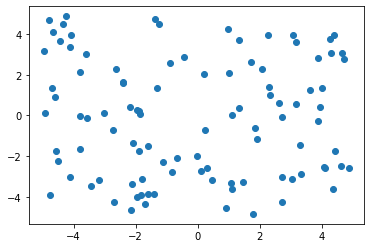

In [18]:
# Affichage de l'ensemble des exemples :
plt.scatter(data_desc[:,0],data_desc[:,1],marker='o')

Il est intéressant de  faire un affichage des points qui tient compte de leur étiquette et utiliser des couleurs différentes pour afficher les points. Pour faire cela, il faut commencer par séparer les exemples selon leur étiquette : ceux de label -1 et ceux de label +1. On utilise pour cela la puissance des `ndarray` pour faire des sélections (slices).

In [19]:
# Extraction des exemples de classe -1:
data_negatifs = data_desc[data_label == -1]
# Extraction des exemples de classe +1:
data_positifs = data_desc[data_label == +1]

On peut alors afficher les points en leur donnant une couleur (''marker'') différente.

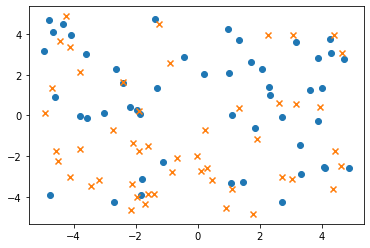

In [20]:
# Affichage de l'ensemble des exemples :
plt.scatter(data_negatifs[:,0],data_negatifs[:,1],marker='o') # 'o' pour la classe -1
plt.scatter(data_positifs[:,0],data_positifs[:,1],marker='x') # 'x' pour la classe +1

<font color="RED" size="+1">**[Q]**</font> En utilisant les instructions précédentes, écrire la fonction `plot2DSet` qui, étant donné deux `ndarray`, un donnant des descriptions et l'autre les labels correspondants, affiche une représentation graphique de ce jeu de données.

In [21]:
# ------------------------ A COMPLETER :

def plot2DSet(data_desc, data_label) :
    
    # Extraction des exemples de classe -1:
    data_negatifs = data_desc[data_label == -1]
    
    # Extraction des exemples de classe +1:
    data_positifs = data_desc[data_label == +1]
    
    # Affichage de l'ensemble des exemples :
    plt.scatter(data_negatifs[:,0],data_negatifs[:,1],marker='o') # 'o' pour la classe -1
    plt.scatter(data_positifs[:,0],data_positifs[:,1],marker='x') # 'x' pour la classe +1

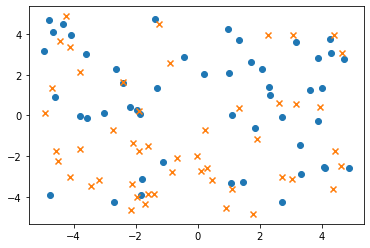

In [22]:
# si tout est ok, l'appel suivant affiche exactement la même chose que précédemment
plot2DSet(data_desc,data_label)

#### Tirage aléatoire selon une loi normale


Pour obtenir un dataset plus ''réaliste'', la loi uniforme n'est pas idéale, il est préférable de générer des dataset en utilisant un tirage aléatoire selon une loi normale (ie. représentée par une gaussienne).

Pour cela, nous utiliserons la fonction `numpy.random.multivariate_normal` :

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.multivariate_normal.html?highlight=gaussian


Dans ce qui suit, on considère toujours un dataset en 2 dimensions (entrée) et 1 dimension (sortie) comme précédemment.

La façon de procéder avec un tel tirage est différente de celle utilisée dans le cas uniforme: 
- on commence par tirer aléatoirement tous les exemples de la classe -1
- puis on tire aléatoirement tous les exemples de la classe +1
- on fusionne ces 2 ensembles en les mettant bout à bout
- le tableau des labels est donc facile à construire: d'abord les -1 puis les +1


<font color="RED" size="+1">**[Q]**</font> Ecrire la fonction <tt>genere_dataset_gaussian</tt> qui, étant donné 5 arguments:
- `positive_center` est le centre de la gaussienne des points positifs (vecteur de taille 2)
- `positive_sigma` est la variance de la gaussienne des points positifs (sous forme de matrice 2*2)
- `negative_center` est le centre de la gaussienne des points négative (vecteur de taille 2)
- `negative_sigma` est la variance de la gaussienne des points négative (sous forme de matrice 2*2)
- `nb_points` est le nombre de points de chaque classe à générer

rend un dataset généré aléatoirement en suivant une loi normale.

In [23]:
mean = (1, 2)
cov = [[1, 0], [0, 1]]
x = np.random.multivariate_normal(mean, cov, 10)
print(x)

[[ 1.09512578  2.66465434]
 [ 0.8597815   1.9668066 ]
 [ 0.25092348  1.22161799]
 [ 1.94884286  3.58085059]
 [ 0.63182906  2.37556463]
 [-0.19315823  1.5909481 ]
 [ 0.55325853  3.52424163]
 [ 1.3229998   0.60658306]
 [-1.17833425  0.95610359]
 [ 1.17269371  2.32419877]]


In [24]:
# ------------------------ A COMPLETER :

def genere_dataset_gaussian(positive_center, positive_sigma, negative_center, negative_sigma, nb_points) :
    
    # Création des descriptions négatives
    negative_data_desc = np.random.multivariate_normal(negative_center, negative_sigma, nb_points)
    
    # Création des descriptions positives
    positive_data_desc = np.random.multivariate_normal(positive_center, positive_sigma, nb_points)
    
    # Fusion des descriptions
    data_desc = np.concatenate((negative_data_desc, positive_data_desc), axis=0)
    
    # Création des labels
    label_desc = np.asarray([-1 for i in range(nb_points)] + [+1 for i in range(nb_points)])
    
    # Retour du tuple des données
    return (data_desc, label_desc)

Taille du dataset généré : (20, 2) exemples


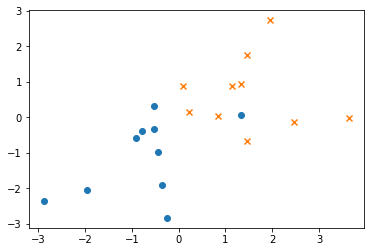

In [25]:
# Exemple d'utilisation:

data_desc, data_label = genere_dataset_gaussian(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Taille du dataset généré :", np.shape(data_desc), "exemples")

# Affichage :
plot2DSet(data_desc,data_label)


In [26]:
data_desc.size

40

## Étape 2: les classifieurs

Un classifieur (binaire dans ce cours) permet, pour chaque point d'entrée donné, de calculer un score (qui est une valeur de $\mathbb{R}$). Si le score est strictement négatif, la donnée est associée à l'étiquette $-1$, sinon elle est associée à l'étiquette $+1$. 


### Représentation orientée objets

Pour implémenter nos algorithmes d'apprentissage et pour représenter les données, nous allons utiliser quelques éléments de programmation orientée objet (POO) qu'autorise le langage Python. 

Si vous ne connaissez rien à la POO, il est fortement conseillé de vous familiariser avec elle, par exemple en commençant par lire une documentation ou suivre un tutorial sur le web (par exemple, http://apprendre-python.com/page-apprendre-programmation-orientee-objet-poo-classes-python-cours-debutants).


### La classe Classifier

Les classifieurs que l'on va implémenter seront définis à l'aide d'une classe qui va dériver de la classe `Classifier` suivante. Cette classe est une classe "abstraite", elle sera dérivée par héritage pour définir des classifieurs particuliers (knn, arbres de décision, etc.).

Cette classe contient 5 méthodes:
- `__init__`: qui permet d'initialiser les paramètres du classifieur. Les classes filles étendront cette méthode en rajoutant les paramètres qui les concernent. Le paramètre obligatoire d'un classifieur est le nombre de dimensions des données qu'il aura à traiter.
- `train`: c'est la méthodes qui permet d'entraîner le modèle, on doit donc donner en argument le dataset qui sert à l'entraînement.
- `score`: cette méthode est utilisée une fois le classifieur entrainé. Elle prend en argument la description d'un exemple et elle rend un score (une valeur de $\mathbb{R}$).
- `predict`: cette méthode, comme la précédente, s'utilise une fois le classifieur entraîné. Elle rend $\hat y$, le label (-1 ou +1) qui est prédit par le classifieur pour la description de l'exemple donnée en argument. Généralement, cette valeur de prédiction $\hat y$ s'obtient à partir du score: si le score est strictement négatif $\hat y$ vaut  $-1$, sinon il vaut $+1$.
- `accuracy`: comme les 2 précédentes, cette méthode s'utilise une fois le classifieur entraîné. Elle permet de calculer la qualité du classifieur sur un dataset donné, cette qualité est mesurée par le taux de bonne classification du classifieur sur le dataset. C'est donc une valeur de $[0,1]$ qui s'obtient divisant le nombre d'exemples du dataset qui sont bien classés par le classifieur par le nombre total d'exemples du dataset.

Les méthodes `train`, `score` et `predict` ne seront pas définies dans la classe `Classifier` mais dans les classes qui hériteront ce cette classe car ces méthodes dépendent du modèle que l'on choisira d'implémenter.

Par contre, la fonction `accuracy` peut être définie dès maintenant dans cette classe `Classifier`.


<font color="RED" size="+1">**[Q]**</font> Compléter la classe `Classifier` ci-dessous en donnant l'implémentation de la fonction `accuracy`. Penser à déjà bien examiner les méthodes existantes dans la classe (et que l'on peut utiliser avant qu'elles soient implémentées).

In [27]:
# ------------------------ A COMPLETER :
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        self.nbDimensions = input_dimension
        #raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        # On crée la valeur d'indice de précision
        accuracy_value = 0
        
        # On vérifie si les prédictions et les valeurs brutes concordent
        for i in range(len(label_set)) :
            if self.predict(desc_set[i]) == label_set[i] :
                accuracy_value += 1
             
        # On retourne l'indice de précision
        return accuracy_value / len(label_set)

### Un premier classifieur 
Nous allons maintenant définir un **classifieur linéaire aléatoire** en étendant la classe `Classifier` et en implémentant le constructeur ainsi que les 3 méthodes `predict`, `score` et `train`.

Pour un classifieur linéaire aléatoire:
- dans le constructeur, on doit générer aléatoirement un vecteur $w$ de taille `input_dimension`. Les poids seront ensuite normalisés.
- pour ce classifieur, la méthode `train` ne fait rien. On ne mettra qu'un print permettant d'afficher le message "Pas d'apprentissage pour ce classifieur"
- pour une description d'exemple $x$, la méthode `score` doit utiliser la valeur de $\langle x | w\rangle$ pour rendre une valeur comprise entre $+1$ et $-1$
- pour une description d'exemple $x$, la méthode `predict` doit utiliser la valeur de $\langle x | w\rangle$ pour prédire le label (+1 ou -1) associé

**Par rapport au cours:**

Il faut être attentif aux entrées/sorties pour bien comprendre ce qui se passe. En programmation objet, on peut avoir une vision moins claire: il faut donc redoubler de vigilance.
1. En apprentissage, on attend des exemples et leurs étiquettes attendues et on sort $w$.
1. En prediction (= inférence), on donne $x$ et $w$ et on sort $\hat y$.



<font color="RED" size="+1">**[Q]**</font> Compléter l'implémentation suivante de la classe <code>ClassifierLineaireRandom</code> qui hérite de la classe `Classifier` et permet de définir un classifieur linéaire aléatoire.

Les entrées/sorties sont les bonnes à chaque étape... Mais il n'y a pas d'apprentissage: $w$ est donc aléatoire (mais il doit être à la bonne dimension pour les calculs soient possibles) et déterminé à la création du classifieur.

In [28]:
# ------------------------ A COMPLETER :
class ClassifierLineaireRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        self.nbDimensions = input_dimension
        self.w = np.asarray([np.random.uniform() for i in range(self.nbDimensions)])
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        print("Pas d'apprentissage pour ce classifieur")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        # Création de la valeur du score de prédiction
        prediction_score = 0.0
        
        # On effectue le calcul entre les vecteurs x et w
        for i in range(x.size):
            prediction_score += np.vdot(self.w[i],x[i])
            
        # Retour du score de prédiction
        return prediction_score
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        
        # Création de la valeur de prediction
        prediction = self.score(x)
        
        # On retourne la prédiction appropriée
        if (prediction < 0) :
            return -1
        else :
            return 1
    

Utilisation de la classe ainsi créée:

In [29]:
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminée

# Création d'un classifieur linéaire aléatoire de dimension 2:
un_classifieur = ClassifierLineaireRandom(2)

# Par définition, ce classifieur n'a pas besoin d'entraînement
un_classifieur.train(data_desc,data_label)

# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(data_desc.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data_desc[i,:][0], data_desc[i,:][1], \
                                                                  data_label[i], \
                                                                  un_classifieur.predict(data_desc[i,:]), \
                                                                  un_classifieur.score(data_desc[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", un_classifieur.accuracy(data_desc,data_label))   


Pas d'apprentissage pour ce classifieur
Classification du dataset:
	-0.254 -2.837 : -1 ---> -1 [-2.79197]
	-0.436 -0.974 : -1 ---> -1 [-1.08960]
	-0.527 -0.341 : -1 ---> -1 [-0.52132]
	+1.341 +0.071 : -1 ---> +1 [+0.56965]
	-0.904 -0.581 : -1 ---> -1 [-0.89070]
	-1.953 -2.048 : -1 ---> -1 [-2.67843]
	-2.876 -2.367 : -1 ---> -1 [-3.32719]
	-0.364 -1.907 : -1 ---> -1 [-1.94896]
	-0.524 +0.304 : -1 ---> +1 [+0.09245]
	-0.788 -0.403 : -1 ---> -1 [-0.67839]
	+0.104 +0.888 : +1 ---> +1 [+0.88307]
	+2.469 -0.124 : +1 ---> +1 [+0.80693]
	+1.950 +2.727 : +1 ---> +1 [+3.32249]
	+1.458 -0.684 : +1 ---> -1 [-0.10453]
	+1.327 +0.919 : +1 ---> +1 [+1.37055]
	+1.468 +1.736 : +1 ---> +1 [+2.20030]
	+0.220 +0.156 : +1 ---> +1 [+0.23092]
	+0.849 +0.034 : +1 ---> +1 [+0.35090]
	+1.150 +0.887 : +1 ---> +1 [+1.27379]
	+3.634 -0.025 : +1 ---> +1 [+1.33705]
Taux de bonne classification sur le dataset:  0.85


<font color="RED" size="+1">**[Q]**</font> Calculer la performance (*accuracy*) d'un classifieur linéaire aléatoire sur un dataset de 100 points générés aléatoirement.

In [30]:
# ------------------------ A COMPLETER :

# On crée 100 points aléatoires
data_desc_100 = np.random.uniform(-5, 5, (100, 2))

# On crée 100 étiquettes aléatoires
data_label_100 = np.asarray([-1 for i in range(50)] + [1 for i in range(50)])
np.random.shuffle(data_label_100)

# On crée un classifieur linéaire aléatoire
classifieur_l_a = ClassifierLineaireRandom(2)

# On entraine le classifieur
classifieur_l_a.train(data_desc_100, data_label_100)

# Classification du dataset (contrôle de predict et score):
print("Classification du dataset:")
for i in range(data_desc_100.shape[0]):
    print("\t{0:+.3f} {1:+.3f} : {2:+} ---> {3:+} [{4:+.5f}]".format(data_desc_100[i,:][0], data_desc_100[i,:][1], \
                                                                  data_label_100[i], \
                                                                  classifieur_l_a.predict(data_desc_100[i,:]), \
                                                                  classifieur_l_a.score(data_desc_100[i,:])) )

# Affichage du taux de bonne classification    
print("Taux de bonne classification sur le dataset: ", classifieur_l_a.accuracy(data_desc_100,data_label_100))

Pas d'apprentissage pour ce classifieur
Classification du dataset:
	+2.320 +0.987 : +1 ---> +1 [+1.68107]
	-3.440 -3.440 : -1 ---> -1 [-3.48417]
	-4.419 +3.662 : +1 ---> -1 [-0.42327]
	+1.011 +2.081 : +1 ---> +1 [+1.56056]
	-4.794 +4.699 : +1 ---> -1 [-0.09478]
	+3.324 -2.877 : -1 ---> +1 [+0.25725]
	-3.182 -3.166 : -1 ---> -1 [-3.21474]
	-1.958 +0.248 : +1 ---> -1 [-0.87683]
	-0.681 -2.088 : -1 ---> -1 [-1.39501]
	+1.119 -3.605 : +1 ---> -1 [-1.23605]
	-2.079 -1.336 : +1 ---> -1 [-1.73307]
	-0.439 +2.852 : -1 ---> +1 [+1.20557]
	-3.003 +0.142 : -1 ---> -1 [-1.46431]
	+0.924 -4.535 : -1 ---> -1 [-1.80207]
	+1.075 -3.295 : -1 ---> -1 [-1.10245]
	-4.349 +4.489 : -1 ---> +1 [+0.02716]
	+4.656 +3.084 : -1 ---> +1 [+3.92764]
	-1.954 -4.023 : +1 ---> -1 [-3.01683]
	+1.842 -0.598 : +1 ---> +1 [+0.64192]
	-3.780 -0.048 : -1 ---> -1 [-1.95687]
	-4.656 +4.093 : -1 ---> -1 [-0.32806]
	-2.412 +1.625 : +1 ---> -1 [-0.41838]
	-1.883 +0.201 : +1 ---> -1 [-0.86216]
	+0.467 -3.151 : +1 ---> -1 [-1.3416

Nous allons maintenant essayer d'analyser le comportement du classifieur. La première étape consiste à analyser graphiquement la décision par rapport aux données. <BR>
**ATTENTION** Ce n'est possible qu'en 2 dimensions


Voici une fonction qui permet de dessiner la frontière de décision d'un classifieur. La valeur `step` permet de choisir la précision de tracé du dessin.
Le code est entièrement fourni mais pour information, l'idée est la suivante:
1. générer une grille de points sur tout l'espace;
1. évaluer le classifieur sur toute la grille;
1. interpoler un niveau de couleur sur tout l'espace représentant les valeurs du classifieur.

In [31]:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])

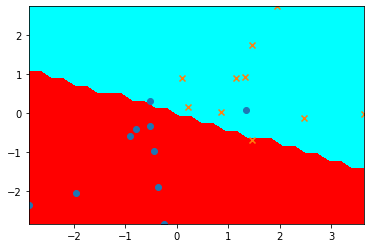

In [32]:
# Affichage de la frontière de séparation des classes
plot_frontiere(data_desc,data_label,un_classifieur)
plot2DSet(data_desc,data_label)

Afin de proposer une second vision du classifieur, on propose de tracer les points en 2D et la décision $f(x)$ dans une troisième dimension, comme nous l'avons vu en cours.

La vision induite est intéressante pédagogiquement... Mais il faut comprendre que l'usage de l'objet classifieur va être différent: il faut utiliser la fonction ```score``` et pas la fonction ```predict```: attention a bien avoir tout défini dans votre classifieur.

In [33]:
from matplotlib import cm
def plot_frontiere_V2(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.score(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer f en 3D:
    fig = plt.gcf()
    ax = fig.gca(projection='3d')
    ax.set_xlabel('X_1')
    ax.set_ylabel('X_2')
    ax.set_zlabel('f(X)')

    surf = ax.plot_surface(x1grid,x2grid,res, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    negatifs = desc_set[label_set == -1]
    # Ensemble des exemples de classe +1:
    positifs = desc_set[label_set == +1]
    # Affichage de l'ensemble des exemples :
    ax.scatter(negatifs[:,0],negatifs[:,1],-1,marker='o', c='b') # 'o' pour la classe -1
    ax.scatter(positifs[:,0],positifs[:,1],1,marker='x',c='r') # 'x' pour la classe +1
    ax.view_init(40, 170) # a régler en fonction des données

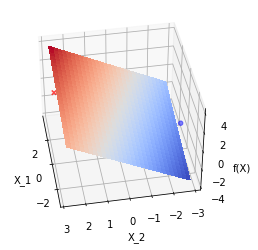

In [34]:
plt.figure()
plot_frontiere_V2(data_desc,data_label,un_classifieur)

Afin de comprendre le pourquoi du comment, analysons les poids du classifieur:
1. Récupération de $w$ dans l'objet classifieur.
1. ```print```
1. Quelle dimension fait monter $f(x)$, quelle dimension fait baisser $f(x)$?

0.3745401188473625
0.8745401188473625
-0.1254598811526375


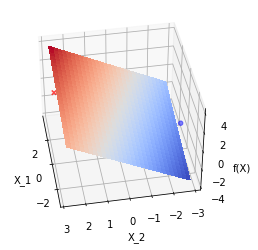

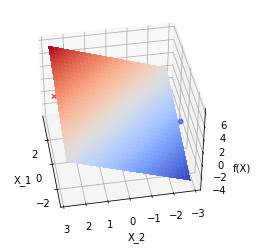

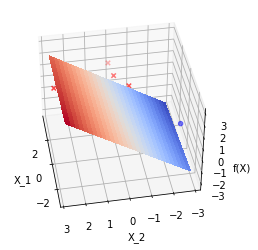

In [35]:
plt.figure()
plot_frontiere_V2(data_desc,data_label,un_classifieur)
print(un_classifieur.w[0])

# On recupere le w du Classifier
recupere_w = un_classifieur.w

# On ajoute 0.5 au x de w et on affiche
recupere_w[0] += 0.5
un_classifieur.w = recupere_w
plt.figure()
plot_frontiere_V2(data_desc,data_label,un_classifieur)
print(un_classifieur.w[0])

# On diminue 0.5 au x de w et on affiche
recupere_w[0] -= 1.
un_classifieur.w = recupere_w
plt.figure()
plot_frontiere_V2(data_desc,data_label,un_classifieur)
print(un_classifieur.w[0])

<font color="RED" size="+1">**[Q]**</font> Afin de vérifier que vous avez bien compris les éléments présentés, nous vous proposons une petite expérience supplémentaire:
1. Tirer un jeu de données (unique)
1. Construire 100 classifieurs linéaires aléatoires sur ces données
1. En évaluant le taux de bonne classification, isoler le meilleur classifieur
1. Evaluer qualitativement le classifieur (forme de la frontière)
1. Analyser pourquoi ce classifieur marche par rapport à la nature des données (même question que ci-dessus)
1. Vérifier votre intuition en construisant à la main le vecteur $w$ d'un classifieur et en vérifiant qu'il a bien de bonne performances

0.57
Vecteur w du meilleur classifieur =  [0.26867248 0.02218474]


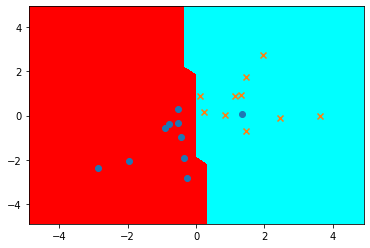

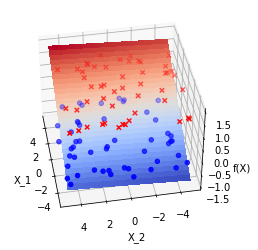

In [36]:
# On tire un jeu de données
# 1) On crée 100 points aléatoires
data_desc_100 = np.random.uniform(-5, 5, (100, 2))

# On crée 100 étiquettes aléatoires
data_label_100 = np.asarray([-1 for i in range(50)] + [1 for i in range(50)])
np.random.shuffle(data_label_100)

# 2) Création de la liste de classifieurs
liste_classifieur = list()
for i in range(100) :
    liste_classifieur.append(ClassifierLineaireRandom(2))
    
# 3) On isole le meilleur classifieur
best_classifieur = liste_classifieur[0]
for i in range(len(liste_classifieur)) :
    if (best_classifieur.accuracy(data_desc_100, data_label_100) < liste_classifieur[i].accuracy(data_desc_100, data_label_100)) :
        best_classifeur = liste_classifieur[i]
        
# On print le taux de bonne classification
print(best_classifieur.accuracy(data_desc_100, data_label_100))

# 4) On affiche le classifieur sous forme de graphe
plot_frontiere(data_desc_100 ,data_label_100 ,best_classifieur)
plot2DSet(data_desc,data_label)
plt.figure()
plot_frontiere_V2(data_desc_100, data_label_100, best_classifieur)

# 5) On affiche le vecteur w du classifieur
print("Vecteur w du meilleur classifieur = ", best_classifieur.w)

# les $k$-plus proches voisins (*$k$-ppv* ou *$k$-NN*)


Le classifieur des $k$-plus proches voisins est très intuitif: il s'agit de prédire la classe majoritaire dans le voisinage d'un point en examinant ses $k$ plus proches voisins (en anglais: $k$ nearest neighbors).
La figure ci-dessous illustre bien le principe général de l'algorithme:

<a href="https://fr.wikipedia.org/wiki/Méthode_des_k_plus_proches_voisins#/media/Fichier:KnnClassification.svg"><img src='ressources/Knn.png' width=300px></a>

Cet algorithme d'apprentissage est particulier: il n'y a pas d'apprentissage, il faut juste stocker tous les points d'apprentissage pour les réutiliser plus tard !! 
En contrepartie, l'inférence coute très cher: il faut analyser tout le dataset pour chaque prédiction afin de trouver les $k$ plus proches voisins de l'exemple à prédire.

Description de la classe `ClassifierKNN` (qui étend `Classifier`):
- dans le constructeur, on précise, en plus de la dimension du dataset, le nombre de voisins à utiliser (valeur de $k$)
- dans la méthode `train`, on donne le dataset qui doit servir de dataset de référence et qui va donc être stocké
- dans la méthode `score`, pour une description d'exemple $x$ donnée :
    - 1) on construit le tableau des distances entre $x$ et les exemples du dataset de référence, 
    - 2) on trie ce tableau grâce à la méthode `numpy.argsort`,
    - 3) le score qui doit être rendu est alors **la proportion de classe +1** parmi les $k$ plus proches voisins de $x$. Ce score est donc un nombre réel de $[0,1]$ qui vaut $0.0$ si tous les $k$ voisins de $x$ sont de la classe $-1$ et qui vaut $1.0$ si tous les $k$ voisins de $x$ sont de laclasse $+1$. <br/> Par conséquent, si $k$ vaut $1$ (on ne regarde que le plus proche voisin), la méthode `score` rend donc soit $0.0$ soit $1.0$ selon la classe de ce voisin.
- dans la méthode `predict`, pour une description d'exemple $x$ donnée, on utilise le score rendu par la fonction précédente pour rendre la classe de l'exemple, c'est-à-dire soit $-1$ soit $+1$. 

<font color="RED" size="+1">**[Q]**</font> Compléter le code de la classe `ClassifierKNN` 

In [37]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    #TODO: A Compléter
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.k = k
        
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        # On crée le tableau des distances entre les descriptions et x
        tab_distance = np.asarray([mt.sqrt(mt.pow(x[0] - self.desc_set[i][0], 2) + mt.pow(x[1] - self.desc_set[i][1], 2)) for i in range(100)])
                          
        # On obtient le tableau des ordres en fonction de la distance (min à max)
        ordre_distance = np.argsort(tab_distance)

        # On renvoie le nombre de voisins +1 parmi les k plus proches voisins
        nbv = 0
        for i in range(self.k) :
            for j in range(len(ordre_distance)) :
                if (ordre_distance[j] == i) :
                    if (self.label_set[ordre_distance[j]] > 0) :
                        nbv += 1
                        
        # On retourne la proportion
        return nbv / self.k
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        if self.score(x) >= 0.5 :
            return 1
        else :
            return -1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        self.desc_set = desc_set
        self.label_set = label_set

<font color="RED" size="+1">**[Q]**</font> Evaluer la classe précédente sur les données jouets que vous avez utilisé jusqu'ici.

Analyser graphiquement les performances du modèle en fonction de $k$.

Coordonnees de x : (0, 0)
Score de x avec 25 voisins = 0.44
Prediction de x avec 25 voisins = -1


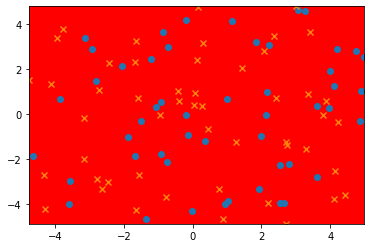

In [38]:
# On crée 100 points aléatoires
data_desc_100 = np.random.uniform(-5, 5, (100, 2))

# On crée 100 étiquettes aléatoires
data_label_100 = np.asarray([-1 for i in range(50)] + [1 for i in range(50)])
np.random.shuffle(data_label_100)

# Création du classifieur
classifieur_knn = ClassifierKNN(2, 25)
classifieur_knn2 = ClassifierKNN(2, 50)
classifieur_knn3 = ClassifierKNN(2, 75)

# On entraine le classifieur
classifieur_knn.train(data_desc_100, data_label_100)
classifieur_knn2.train(data_desc_100, data_label_100)
classifieur_knn3.train(data_desc_100, data_label_100)

# On print le score de x
x = (0, 0)
print("Coordonnees de x :", x)
print("Score de x avec", classifieur_knn.k, "voisins =", classifieur_knn.score(x))
print("Prediction de x avec", classifieur_knn.k, "voisins =", classifieur_knn.predict(x))

plot_frontiere(data_desc_100, data_label_100, classifieur_knn)
plot2DSet(data_desc_100,data_label_100)

Coordonnees de x : (0, 0)
Score de x avec 50 voisins = 0.5
Prediction de x avec 50 voisins = 1


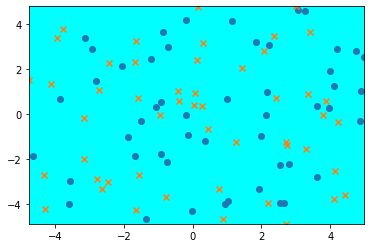

In [39]:
print("Coordonnees de x :", x)
print("Score de x avec", classifieur_knn2.k, "voisins =", classifieur_knn2.score(x))
print("Prediction de x avec", classifieur_knn2.k, "voisins =", classifieur_knn2.predict(x))

plot_frontiere(data_desc_100, data_label_100, classifieur_knn2)
plot2DSet(data_desc_100,data_label_100)

Coordonnees de x : (0, 0)
Score de x avec 75 voisins = 0.5066666666666667
Prediction de x avec 75 voisins = 1


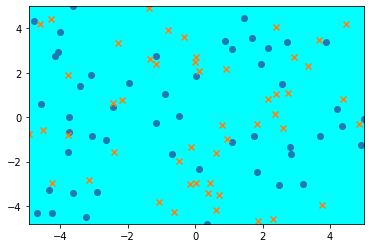

In [256]:
print("Coordonnees de x :", x)
print("Score de x avec", classifieur_knn3.k, "voisins =", classifieur_knn3.score(x))
print("Prediction de x avec", classifieur_knn3.k, "voisins =", classifieur_knn3.predict(x))

plot_frontiere(data_desc_100, data_label_100, classifieur_knn3)
plot2DSet(data_desc_100,data_label_100)

## Données réelles UCI & USPS

Plusieurs datasets sont récupérables directement en python depuis la bibliothèque scikit-learn:
https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets

Il est aussi possible de jouer avec les données USPS (chiffres manuscrits) qui ont été présentées en cours.
Dans la suite, nous vous proposons une petite étude sur USPS.


<font color="RED" size="+1">**[Q]**</font> Charger les données (le code est fourni) puis isoler les 1 et les 2 pour créer un problème binaire.

Pour cette sélection de données en numpy, il peut être intéressant de faire appel à `np.where`

In [260]:
import pickle as pkl

data = pkl.load(open('ressources/usps.pkl', 'rb'))
X = np.array(data['X_train'], dtype=float) # conversion de type pour une meilleure compatibilité
Y = np.array(data['Y_train'], dtype=float)

# ------------------------ A COMPLETER :
# reduction du jeu de donnée

X12 = np.array([ X[i] for i in np.where((Y==1) | (Y==2))[0]]) 
Y12 = np.array([ Y[i] for i in np.where((Y==1) | (Y==2))[0]])



<font color="RED" size="+1">**[Q]**</font> Prise en main des données:
1. Afficher les dimensions des données
1. Afficher la première image du jeu de données en utilisant `reshape` et `imshow` comme vu en cours.
1. Donner l'histogramme d'illumination du premier pixel (0) puis pour le pixel 219. Analyser le résultat
1. Sur le pixel 219, afficher l'histogramme des illuminations pour la classe 1 et pour la classe 2: vous semble-il possible de classer les données sur la base de cette seule information? Quel serait le taux de bonne classification?


In [277]:
# ------------------------ A COMPLETER :

# On affiche la dimension des données
print("1) La dimension des données est :", (len(X), len(Y)))

# On affiche la premiere image du jeu
print(len(X[0]))

1) La dimension des données est : (6229, 6229)
256


<font color="RED" size="+1">**[Q]**</font> Construire un classifieur aléatoire pour ces données en utilisant le code précédent. Evaluer les performances.

Le but de cette question est de vérifier que votre code n'est pas dépendant des dimensions des données: il doit s'adapter aux 256 dimensions des chiffres.

In [ ]:
# ------------------------ A COMPLETER :



<font color="RED" size="+1">**[Q]**</font> Application du classifieur des $k$-plus proches voisins sur `X12` avec $k=5$. Evaluer les performances de votre classifieur

In [ ]:
# ------------------------ A COMPLETER :



<font color="RED" size="+1">**[Q]**</font> Que se passe-t-il si on prend $k=1$? Que va donner le taux de bonne classification? 

Ce résultat est-il satisfaisant? 
Note: il existe dans les données chargées précédemment, des données `X_test`. Estimer maintenant la performance du classifieur sur ces données.

In [ ]:
# ------------------------ A COMPLETER :



<font color="RED" size="+1">**[Q]**</font> Proposer une nouvelle version de classifieur $k$-ppv capable de fonctionner pour des problèmes multi-classes, c'est-à-dire quand il existe $C$ classes. Tester les performances de ce nouveau classifieur sur les données USPS.

Tenter des modifications sur les données (binarisation, suppression des colonnes de trop forte entropie...) et étudier l'impact sur les performances.

In [ ]:
# ------------------------ A COMPLETER :



In [ ]:
np.unique([1, 2, 4, 4, 1, 0], return_counts=True)